## Importazione del dataset

In [1]:
import igraph as ig
import numpy as np
import random
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
random.seed(0)

In [2]:
csv_file_path = '../reddit_comments.csv'
df = pd.read_csv(csv_file_path)
print(df.shape)

(3763, 13)


## Selezione di un singolo post

Nel seguente grafo (relativo al primo post) i nodi sono le persone che hanno commentato sotto al post:

In [5]:
# Filtro i commenti relativi al primo post nel dataframe
post_id = df['post_id'].iloc[0]
post_comments = df[df['post_id'] == post_id]

In [12]:
df.columns

Index(['comment_id', 'comment_author_id', 'comment_author_name',
       'comment_parent_id', 'comment_parent_name', 'comment_score',
       'comment_replies', 'comment_posted_time', 'comment_body', 'post_id',
       'post_title', 'post_url', 'post_subreddit'],
      dtype='object')

In [13]:
# Rimuovo i prefissi dagli ID dei commenti genitori
post_comments['comment_parent_id'] = post_comments['comment_parent_id'].str.replace(r'^t\d_', '', regex=True)

C:\Users\franc\AppData\Local\Temp\ipykernel_18928\4115249832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_comments['comment_parent_id'] = post_comments['comment_parent_id'].str.replace(r'^t\d_', '', regex=True)


In [14]:
post_comments

comment_id comment_author_id comment_author_name comment_parent_id   
0      k9yfohd          209w6fpg          moonwave91                 0  \
1      k9xjbzd           deleted             deleted                 0   
2      k9zies2         e5pmjzs5c       MainDelay9804                 0   
3      k9xb0xr          utwr8mto        AlessandroIT                 0   
4      k9xmjhd          49phg2z0        CthulhuParty                 0   
..         ...               ...                 ...               ...   
569    k9y62fj           deleted             deleted          1rz25eig   
570    ka031nw           mwtgrnt             krell46           deleted   
571    k9zqygu             tsm4b            plitaway           krzdjmj   
572    k9yh8wj          1rz25eig            Sir_elle           deleted   
573    ka2lsst          3lqftbnh   Cheese_Kransky126          drtlcuuq   

    comment_parent_name  comment_score  comment_replies  comment_posted_time   
0                    OP            160                2         1.700439e+09  \
1                    OP            310                3         1.700426e+09   
2                    OP             22                0         1.700459e+09   
3                    OP             83                1         1.700422e+09   
4                    OP             87                1         1.700427e+09   
..                  ...            ...              ...                  ...   
569            Sir_elle              1                0         1.700435e+09   
570             deleted              2                0         1.700477e+09   
571      TengenToppa999              1                0         1.700466e+09   
572             deleted              3                0         1.700440e+09   
573      SleepyLawrence              1                0         1.700517e+09   

                                          comment_body  post_id   
0    Il vero problema è l'immensa orda di giornalis...  17z2hci  \
1    Non è un idiota l'ex ragazzo, è un assassino, ...  17z2hci   
2    Sono sti ragazzetti sui social che ormai han p...  17z2hci   
3    Non fatevi influenzare dai post, continuate ad...  17z2hci   
4    ti da fastidio perchè percepisci giustamente c...  17z2hci   
..                                                 ...      ...   
569  Lol ma guarda che non ho detto di essere io la...  17z2hci   
570  Io non ho letto istigazioni all’odio, ho letto...  17z2hci   
571  Ma che insulto, sempre a fare le vittime state...  17z2hci   
572  Non c e nulla da comprendere sei te che non ha...  17z2hci   
573  Essere bravi in cucina significa sapersi prend...  17z2hci   

                                       post_title   
0    Ho visto troppi post sulla Giulia Cecchettin  \
1    Ho visto troppi post sulla Giulia Cecchettin   
2    Ho visto troppi post sulla Giulia Cecchettin   
3    Ho visto troppi post sulla Giulia Cecchettin   
4    Ho visto troppi post sulla Giulia Cecchettin   
..                                            ...   
569  Ho visto troppi post sulla Giulia Cecchettin   
570  Ho visto troppi post sulla Giulia Cecchettin   
571  Ho visto troppi post sulla Giulia Cecchettin   
572  Ho visto troppi post sulla Giulia Cecchettin   
573  Ho visto troppi post sulla Giulia Cecchettin   

                                              post_url post_subreddit  
0    https://www.reddit.com/r/Italia/comments/17z2h...       t5_2rbm5  
1    https://www.reddit.com/r/Italia/comments/17z2h...       t5_2rbm5  
2    https://www.reddit.com/r/Italia/comments/17z2h...       t5_2rbm5  
3    https://www.reddit.com/r/Italia/comments/17z2h...       t5_2rbm5  
4    https://www.reddit.com/r/Italia/comments/17z2h...       t5_2rbm5  
..                                                 ...            ...  
569  https://www.reddit.com/r/Italia/comments/17z2h...       t5_2rbm5  
570  https://www.reddit.com/r/Italia/comments/17z2h...       t5_2rbm5  
571  https://www.reddit.com/r/Italia/comments/17z2h...       t5_

In [15]:
# Mi assicuro che i dati siano del tipo corretto (stringhe per ID)
post_comments['comment_id'] = post_comments['comment_id'].astype(str)
post_comments['comment_parent_id'] = post_comments['comment_parent_id'].astype(str)

C:\Users\franc\AppData\Local\Temp\ipykernel_18928\2244879157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_comments['comment_id'] = post_comments['comment_id'].astype(str)
C:\Users\franc\AppData\Local\Temp\ipykernel_18928\2244879157.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_comments['comment_parent_id'] = post_comments['comment_parent_id'].astype(str)


### Creazione dei nodi del grafo

In [16]:
# Creazione dei nodi (autori dei commenti)
comment_authors = post_comments['comment_author_name'].unique()

In [17]:
# Creo un grafo vuoto
g = ig.Graph(directed=True)

# Aggiungo i nodi al grafo (gli autori dei commenti)
g.add_vertices(comment_authors)

In [26]:
# Lista per gli archi (con sorgente, destinazione e peso)
edges = []

In [19]:
for _, comment in post_comments.iterrows():
    #print(_)
    print(comment)

comment_id                                                       k9yfohd
comment_author_id                                               209w6fpg
comment_author_name                                           moonwave91
comment_parent_id                                                      0
comment_parent_name                                                   OP
comment_score                                                        160
comment_replies                                                        2
comment_posted_time                                         1700439355.0
comment_body           Il vero problema è l'immensa orda di giornalis...
post_id                                                          17z2hci
post_title                  Ho visto troppi post sulla Giulia Cecchettin
post_url               https://www.reddit.com/r/Italia/comments/17z2h...
post_subreddit                                                  t5_2rbm5
Name: 0, dtype: object
comment_id                  

### Creazione degli archi del grafo

Controllo se il nodo è top level oppure no e creo tutti gli archi del mio grafo:

In [27]:
for _, comment in post_comments.iterrows():
    if (comment['comment_parent_id'] != '0' and comment['comment_parent_name'] != 'deleted'):
        source = comment['comment_parent_name']
        target = comment['comment_author_name']
        weight = comment['comment_score']  # Uso lo score del commento come peso dell'arco
        edges.append((source, target, weight))

In [28]:
edges

[('moonwave91', 'Scarsocontesto', 30),
 ('moonwave91', 'rossi46go', 16),
 ('AlessandroIT', 'DERPESSION', 19),
 ('CthulhuParty', 'professional_oxy', 22),
 ('lorefighter', 'frds3', 9),
 ('QuelTizioLaggiu', 'AostaValley', 8),
 ('QuelTizioLaggiu', 'LadyMacSantis', 3),
 ('emmagol', 'WillyMckenna', 47),
 ('emmagol', 'Hiro34', 18),
 ('emmagol', 'deleted', -3),
 ('emmagol', 'headlessfreak1592', 0),
 ('emmagol', '44252381471', -7),
 ('sBrrtou97', 'bbossolo', 9),
 ('sBrrtou97', 'South_Creme181', -4),
 ('Astroruggie', 'Strider2126', 49),
 ('Astroruggie', 'Sir_elle', 39),
 ('Astroruggie', 'sfwthrowaway96', 49),
 ('Astroruggie', 'AostaValley', 25),
 ('Astroruggie', 'Dakem94', 22),
 ('Astroruggie', 'Frank_Cy', 21),
 ('Astroruggie', 'LadyMacSantis', 7),
 ('Astroruggie', 'wombawumpa', 3),
 ('Astroruggie', 'fantasmeeno', 7),
 ('Astroruggie', 'headlessfreak1592', 0),
 ('Astroruggie', 'deleted', -16),
 ('Sir_elle', 'Desperate-Pea-2091', 2),
 ('1_dont_care', 'Pop0_LoW', 2),
 ('1_dont_care', '16F628A', 2),

In [29]:
# Aggiungi gli archi al grafo con peso
g.add_edges([(source, target) for source, target, _ in edges])

# Aggiungi i pesi agli archi
g.es['weight'] = [weight for _, _, weight in edges]

In [30]:
# Stampo il sommario del grafo
g.summary()
print(g)

IGRAPH DNW- 205 358 --
+ attr: name (v), weight (e)
+ edges (vertex names):
moonwave91->Scarsocontesto, moonwave91->rossi46go, AlessandroIT->DERPESSION,
CthulhuParty->professional_oxy, lorefighter->frds3,
QuelTizioLaggiu->AostaValley, QuelTizioLaggiu->LadyMacSantis,
emmagol->WillyMckenna, emmagol->Hiro34, emmagol->deleted,
emmagol->headlessfreak1592, emmagol->44252381471, sBrrtou97->bbossolo,
sBrrtou97->South_Creme181, Astroruggie->Strider2126, Astroruggie->Sir_elle,
Astroruggie->sfwthrowaway96, Astroruggie->AostaValley, Astroruggie->Dakem94,
Astroruggie->Frank_Cy, Astroruggie->LadyMacSantis, Astroruggie->wombawumpa,
Astroruggie->fantasmeeno, Astroruggie->headlessfreak1592,
Astroruggie->deleted, Sir_elle->Desperate-Pea-2091, 1_dont_care->Pop0_LoW,
1_dont_care->16F628A, squadraRMN->btlop, squadraRMN->allegrigri,
squadraRMN->South_Creme181, squadraRMN->Clank_8-7, squadraRMN->deleted,
squadraRMN->deleted, varrr->RiccardoForni, Zealousideal_Humor55->Alxssandro,
Zealousideal_Humor55->Pop0_L

In [31]:
# Visualizzazione del grafo con frecce e spessore degli archi basato sul peso
def plot_graph(g):
    
    ig.plot(
        g, 
        vertex_size=20, 
        edge_arrow_size=0.5,    
        edge_width=[0.5 + 2 * weight / max(g.es['weight']) for weight in g.es['weight']],  # Spessore degli archi basato sul peso
        margin=50,
        vertex_label_dist= 2,
        bbox=(800, 800),
    )

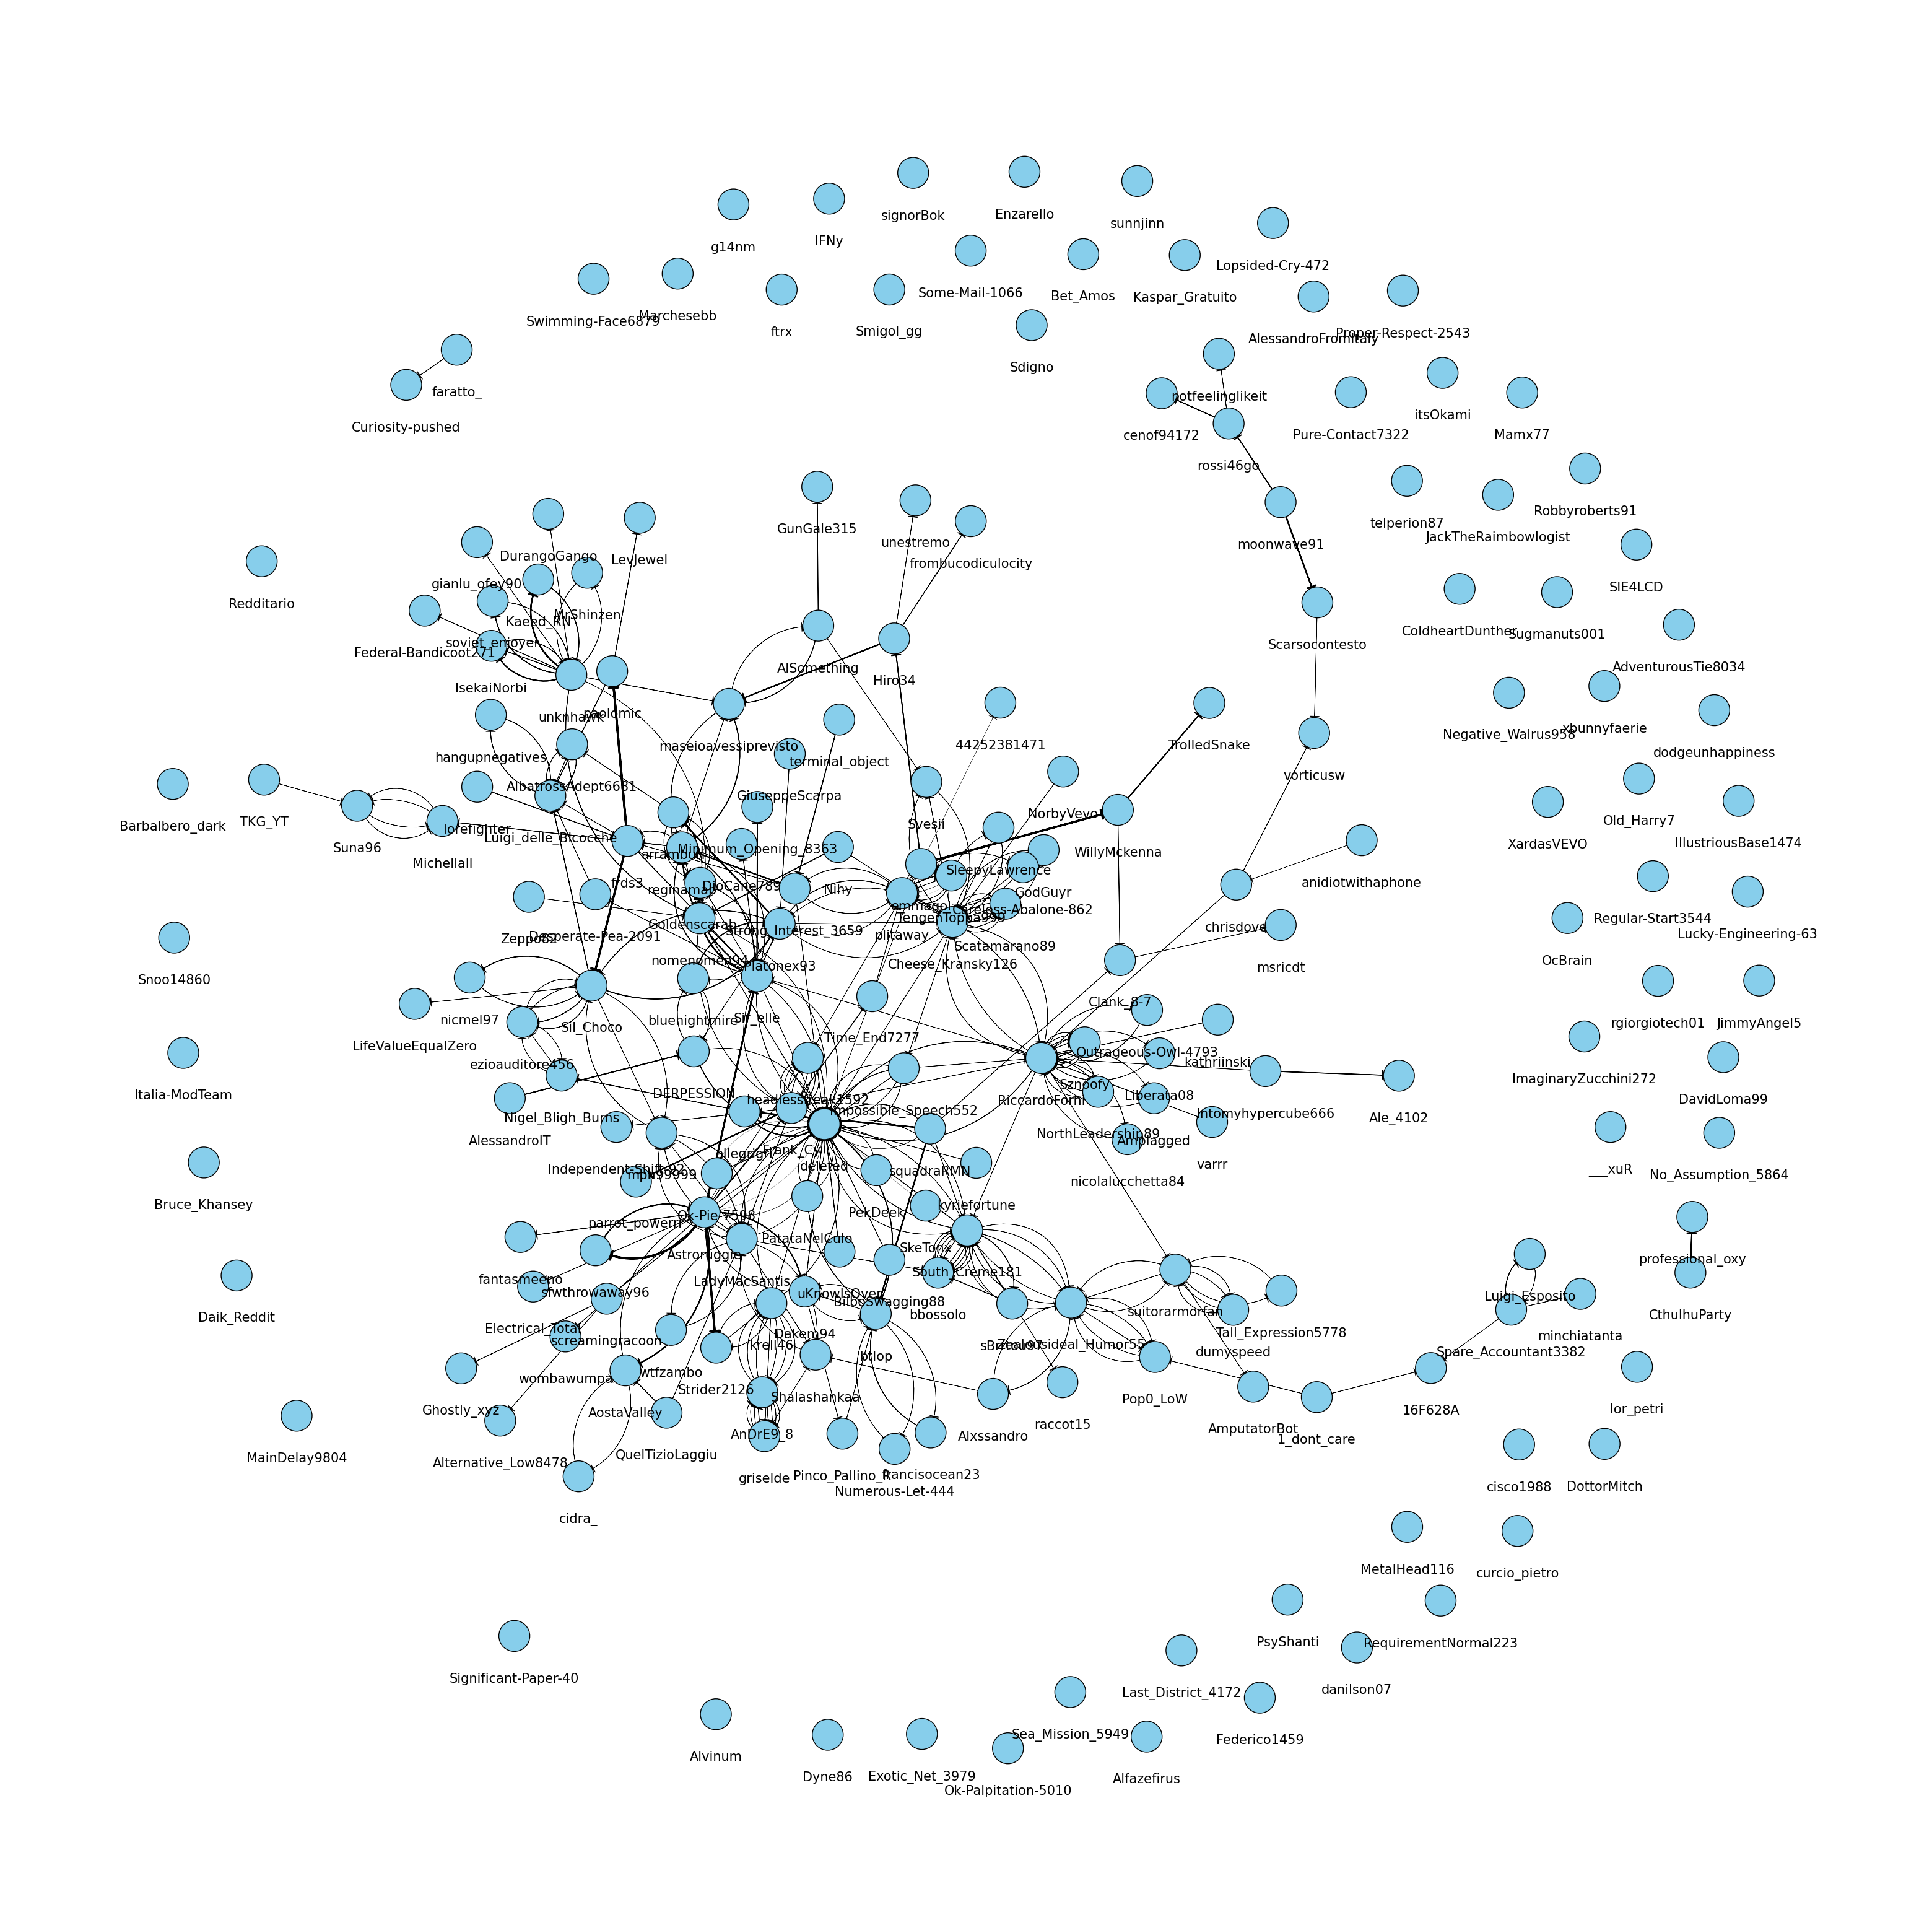

In [58]:
import matplotlib.pyplot as plt  # Importa Matplotlib per la visualizzazione grafica
import igraph as ig  # Importa iGraph per la manipolazione dei grafi

# Funzione per visualizzare il grafo
def plot_graph(g):
    # Utilizza il layout Fruchterman-Reingold
    layout = g.layout_fruchterman_reingold()
    # Scala il layout per aumentare la distanza tra i nodi
    layout = [[x*50, y*50] for x, y in layout]
    
    # Crea una figura e un asse con dimensioni aumentate (24x24 pollici)
    fig, ax = plt.subplots(figsize=(40, 40))

    # Configurazione dello stile di visualizzazione
    visual_style = {
        "layout": layout,  # Utilizza il layout Kamada-Kawai
        "vertex_label": g.vs["name"],  # Etichette dei nodi basate sul nome dei vertici
        "vertex_size": 50,  # Aumenta la dimensione dei nodi a 50
        "vertex_color": "skyblue",  # Colore dei nodi azzurro
        "vertex_label_size": 15,  # Aumenta la dimensione delle etichette dei nodi a 15
        "edge_color": "black",  # Colore degli archi nero
        "edge_arrow_size": 2,  # Aumenta la dimensione delle frecce degli archi a 2
        "edge_width": [0.5 + 2 * weight / max(g.es['weight']) for weight in g.es['weight']],  # Spessore degli archi basato sul peso
        "margin": 50,  # Imposta un margine di 100
        "vertex_label_dist": 2,  # Imposta la distanza delle etichette dei nodi a 2
        "bbox": (1200, 1200),  # Dimensione dell'area di disegno (1200x1200 pixel)
        "target": ax,  # Specifica l'asse come destinazione per il disegno del grafo
    }

    # Disegna il grafo con lo stile di visualizzazione specificato
    ig.plot(g, **visual_style)
    # Mostra la figura
    plt.show()

# Visualizza il grafo
plot_graph(g)


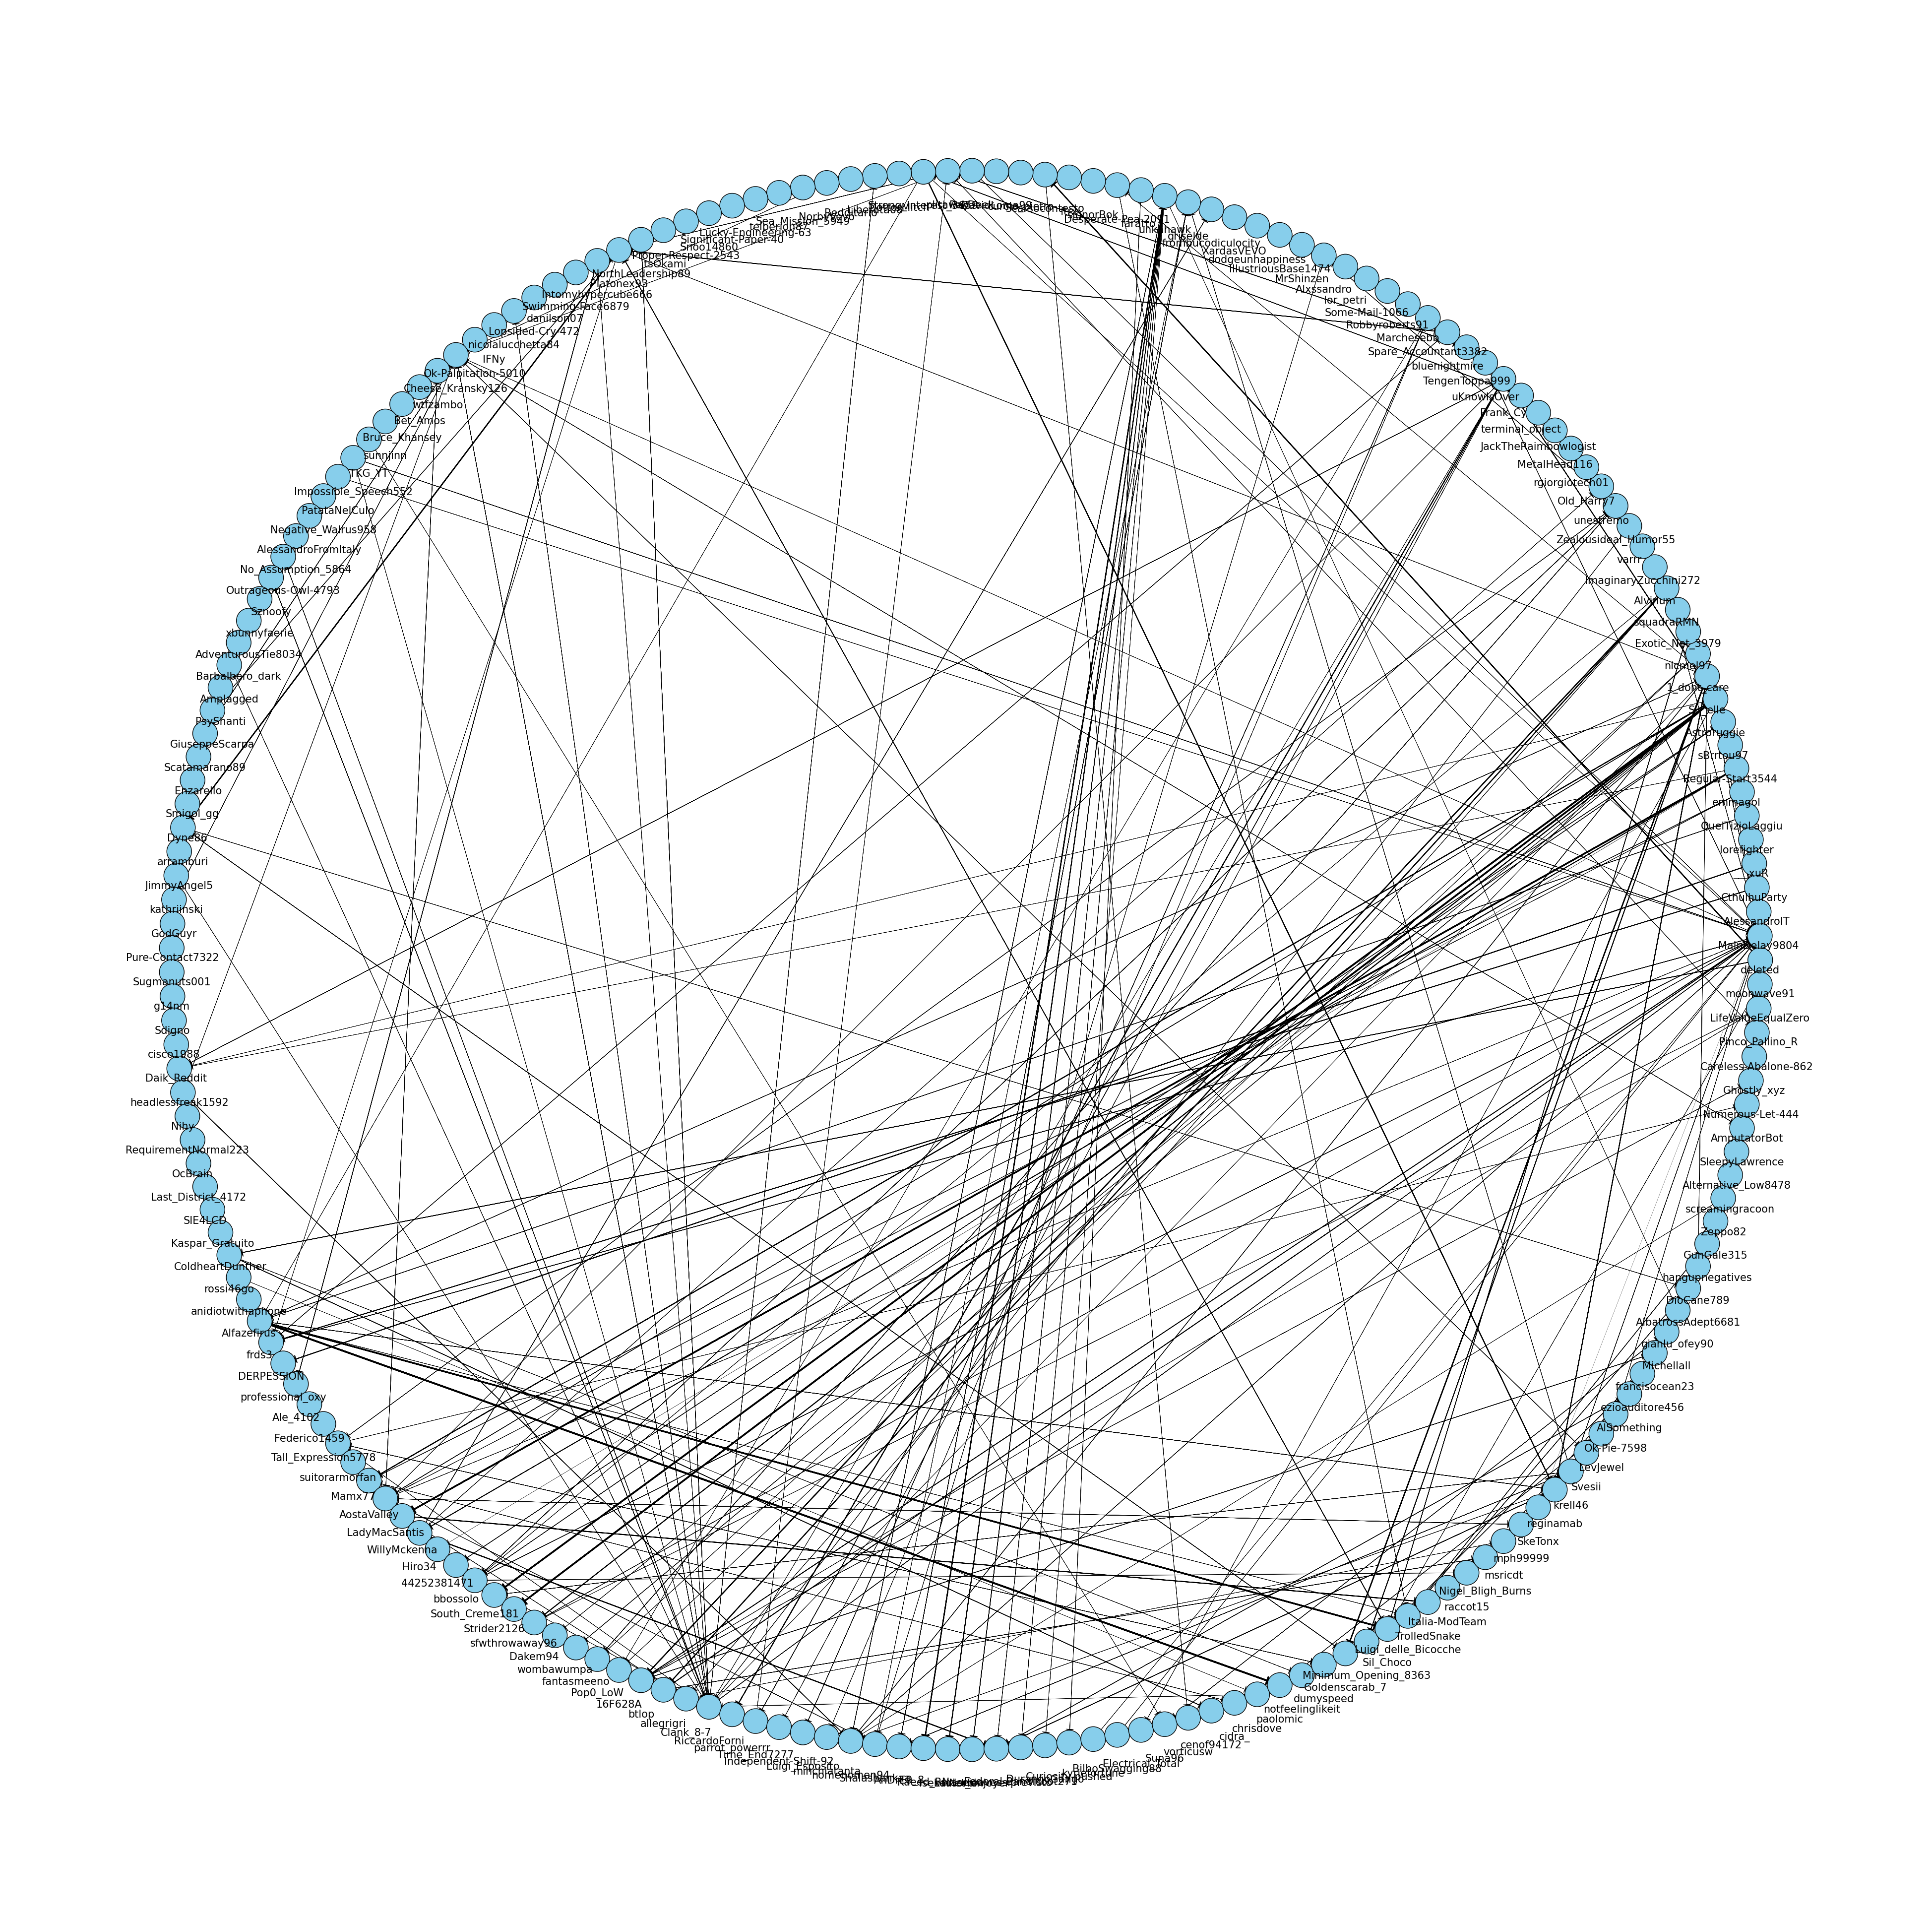

In [57]:
import matplotlib.pyplot as plt
import igraph as ig

# Funzione per visualizzare il grafo
def plot_graph(g):
    # Utilizza il layout circolare
    layout = g.layout_circle()

    # Scala il layout per aumentare la distanza tra i nodi
    raggio_cerchio = 600  # Imposta il raggio del cerchio (puoi regolare questo valore)
    layout = [[raggio_cerchio * x, raggio_cerchio * y] for x, y in layout]

    # Crea una figura e un asse con dimensioni aumentate (24x24 pollici)
    fig, ax = plt.subplots(figsize=(50, 50))

    # Configurazione dello stile di visualizzazione
    visual_style = {
        "layout": layout,  # Utilizza il layout circolare scalato
        "vertex_label": g.vs["name"],  # Etichette dei nodi basate sul nome dei vertici
        "vertex_size": 50,  # Aumenta la dimensione dei nodi a 50
        "vertex_color": "skyblue",  # Colore dei nodi azzurro
        "vertex_label_size": 15,  # Aumenta la dimensione delle etichette dei nodi a 15
        "edge_color": "black",  # Colore degli archi nero
        "edge_arrow_size": 2,  # Aumenta la dimensione delle frecce degli archi a 2
        "edge_width": [0.5 + 2 * weight / max(g.es['weight']) for weight in g.es['weight']],  # Spessore degli archi basato sul peso
        "margin": 50,  # Imposta un margine di 50
        "vertex_label_dist": 2,  # Imposta la distanza delle etichette dei nodi a 2
        "bbox": (1200, 1200),  # Dimensione dell'area di disegno (1200x1200 pixel)
        "target": ax,  # Specifica l'asse come destinazione per il disegno del grafo
        "edge_curved": 0,  # Imposta la curvatura degli archi a 0 per renderli dritti
    }

    # Disegna il grafo con lo stile di visualizzazione specificato
    ig.plot(g, **visual_style)
    # Mostra la figura
    plt.show()

# Visualizza il grafo
plot_graph(g)


In [59]:
# Verifica degli archi
print(f"Number of edges: {g.ecount()}")
print("Edges:")
for edge in g.es[:10]:  # Itera sui primi 10 archi
    print(edge.tuple)

Number of edges: 358
Edges:
(0, 48)
(0, 115)
(3, 119)
(4, 120)
(6, 118)
(7, 126)
(7, 127)
(8, 128)
(8, 129)
(8, 1)


In [51]:
g.vs.attribute_names()

['name', 'color']